<a href="https://colab.research.google.com/github/HelloJacob11/Data-Analysis/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
testset=pd.read_csv('/content/drive/MyDrive/2025 Summer Projects/Customer_Segmentation/flight_test.csv')
testset

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,27355,9/19/2011,6/2/2012,Male,4,nanjing,jiangsu,CN,29.0,3/31/2014,...,0.0,2005,9/30/2012,549,120.0,120,0,1.000000,2879,6
1,4032,9/18/2012,9/18/2012,Female,4,changchunshi,jilinsheng,CN,43.0,3/31/2014,...,984.0,2301,2/4/2014,57,252.0,477,0,0.871291,1731,0
2,12913,3/18/2009,3/18/2009,Male,4,beijing,beijing,CN,31.0,3/31/2014,...,0.0,2397,3/13/2013,385,115.5,167,0,0.836358,1626,0
3,58465,9/6/2012,10/3/2012,Male,4,shantou,guangdong,CN,30.0,3/31/2014,...,485.0,2852,6/18/2013,288,86.0,174,0,0.702924,1786,0
4,45414,6/13/2012,9/6/2012,Male,4,guangzhou,guangdong,CN,40.0,3/31/2014,...,442.0,3777,2/25/2014,36,268.5,536,0,0.530725,3639,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.0,4,1,0.000000,12318,22
7984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.0,60,14,0.000000,106972,43
7985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.0,166,0,0.000000,0,0
7986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.0,12,0,0.000000,0,0


In [4]:
import pandas as pd
trainset=pd.read_csv('/content/drive/MyDrive/2025 Summer Projects/Customer_Segmentation/flight_train.csv')
trainset

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,33264,1/29/2013,1/29/2013,Male,4,shenzhen,guangdong,CN,32.0,3/31/2014,...,0.0,3453,3/30/2013,368,60.000000,60,0,0.580828,1967,0
54996,3826,11/14/2008,12/12/2008,Male,4,guangzhou,guangdong,CN,56.0,3/31/2014,...,0.0,3820,3/11/2013,387,173.000000,173,0,0.525000,1452,0
54997,10522,4/29/2011,4/29/2011,Male,4,shanghai,shanghai,CN,42.0,3/31/2014,...,0.0,4222,9/9/2012,570,94.000000,94,0,0.475000,2259,1
54998,16872,6/18/2010,6/18/2010,Female,4,benxishi,liaoningsheng,CN,36.0,3/31/2014,...,2163.0,2596,3/10/2014,22,33.000000,82,0,0.772500,2074,0


## RFM Model
> (R) current consumption time interval, (F) consumption frequency, (M) total consumption identified.

> RFM model is a marketing analytics frameowrk used to segment customers based on their purchase or usage behavior

- R(Recency): Last Flight Date / Last to End / Load Time
  - Last to End->Load Time - Last Flight Date

- F(Frequency): Exchange Count / Avg Interval /
  - FFP Tier

- M(Monetary): Sum YR 2 / Seg Km Sum / Avg Discount / Points Sum / Point Not Flight

- Extra: FFP Date / Gender/ Work City / Work Province/ Work Country / Age

In [5]:
trainset.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [6]:
trainset.columns

select = ['MEMBER_NO','GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_TO_END']

trinset = trainset[select]
trinset.head()

,MEMBER_NO,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_TO_END
0,54993,Male,.,beijing,CN,3/31/2014,1
1,28065,Male,NaN,beijing,CN,3/31/2014,7
2,55106,Male,.,beijing,CN,3/31/2014,11
3,21189,Male,Los Angeles,CA,US,3/31/2014,97
4,39546,Male,guiyang,guizhou,CN,3/31/2014,5


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


### R(Recency): Last to End
*Last to End->Load Time - Last Flight Date*

**1. Distribution Characteristics:**  
Most values are concentrated around 0–50, but some extend up to 800, forming a right-skewed distribution with a long tail. Such long-tailed variables can effectively capture differences in customer behavior patterns.

* Example:

  * Small values → Customers who used the service recently
  * Large values → Customers who haven’t used the service for a long time (dormant or at risk of churn)

**2. Potential as a Customer Status Indicator:**  
A small value may imply “recent usage,” while a large value may mean “long-term inactivity,” making it useful for churn prediction and customer segmentation.

* Important feature for clustering (segmentation)
* Strategy: Send reminder emails, coupons, or promotions to customers whose values exceed a certain threshold.

**3. Points to Note in Analysis:**  
Outliers are frequent, which can distort the mean → log transformation or quantile cut may be necessary.
When using it as a model input, apply scaling (e.g., StandardScaler/MinMaxScaler).

/tmp/ipython-input-1463964679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainset['LAST_TO_END'],


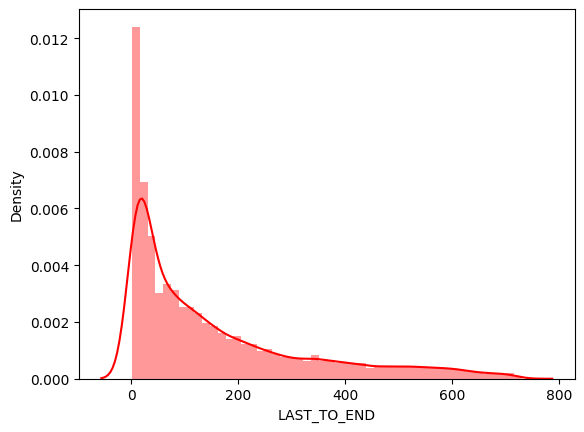

In [8]:
sns.distplot(trainset['LAST_TO_END'],
             kde=True,
             color='red')

plt.show()

Flight Count Density Graph
- Skewed Right Distribution
- Outliers extending from 80 to 200
- Center: ~5 Flights
- Range: 220
#### This distribution is heavily skewed and it can reveal a lot about customer purchase patterns
- Provide bonuses or loyalty membership to customers who fly more often than 50% percentile of customers
- Provide discount offers to customers who fly less than 50% percentile of customers

Exchange Count Density Graph

- A multimodal distribution
- Exchange count indicates number of times a customer either rescheduled or canceled a flight. Therefore, it is difficult to extract a pattern and use this graph for customer segmentation purpose.


/tmp/ipython-input-2518104005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainset['FLIGHT_COUNT'],
/tmp/ipython-input-2518104005.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainset['EXCHANGE_COUNT'],


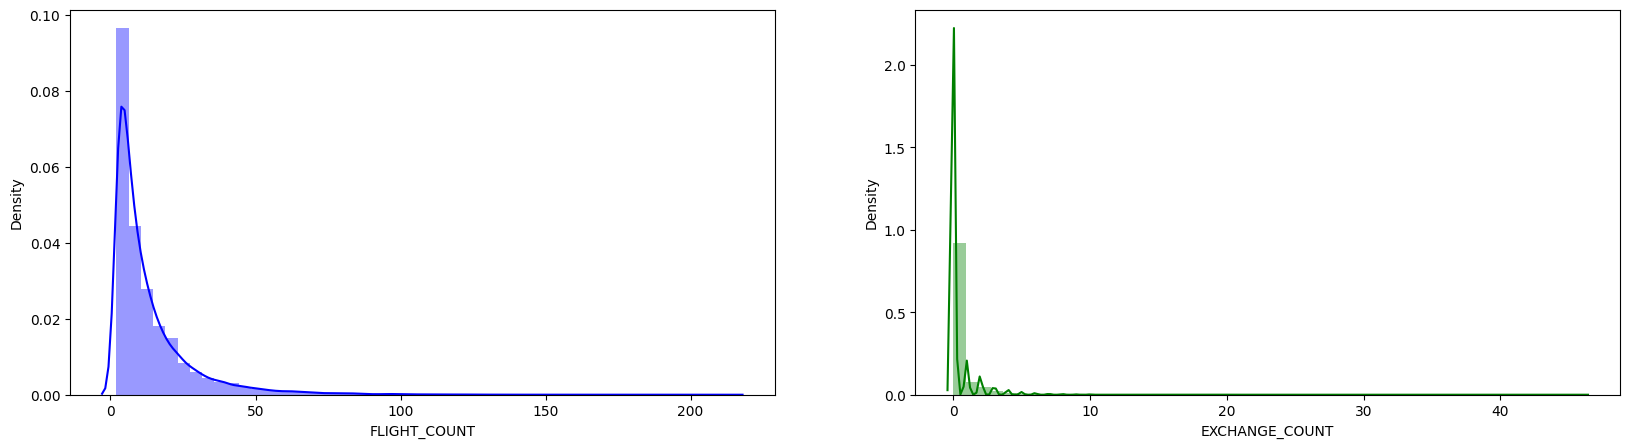

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(trainset['FLIGHT_COUNT'],
             kde=True,
             color='blue')
plt.subplot(1,2,2)
sns.distplot(trainset['EXCHANGE_COUNT'],
             kde=True,
             color='green')
plt.show()

### F(Frequency): Avg Interval
*Avg Interval: How often, on average, a person takes a flight within a given time period*

**1. Distribution Characteristics:**  
Most values are concentrated around 0-100, but some extend up to 400, forming a right-skewed distribution with a long tail. Such long-tailed variables can effectively capture differences in customer behavior patterns.

* Example:

  * Small values → Customers who uses the service on a regular basis
  * Large values → Customers who haven’t used the service for a long time (dormant or at risk of churn)

**2. Potential as a Customer Status Indicator:**  
A small value may imply “frequent usage,” while a large value may mean “Infrequent usage,” making it useful for customer segmentation.

* Important feature for clustering (segmentation)
* Strategy #1: Promote Loyalty & Rewards Program, offer discounted trips, and launch off-peak deals to customers whose Avg Interal values are large.
* Strategy #2: Offer exclusive rewards (Ex: Bonus mileage), bundled travel services, and enhanced flyer perks (Ex: lounge acess, free upgrades) to customers whose Avg Interal values are small.


/tmp/ipython-input-312966926.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainset['AVG_INTERVAL'],


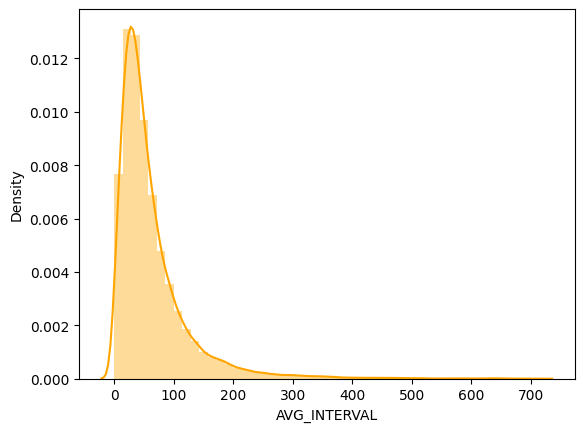

'AVG_INTERVAL'

In [11]:
sns.distplot(trainset['AVG_INTERVAL'],
             kde=True,
             color='orange')

plt.show()
'AVG_INTERVAL'

### M(Monetary): Points_Sum - Point_NotFlight
*Points_Sum-Point_NotFlight: The total number of points a customer has earned through flights on the airline only, exlcusing partners or credit points

**1. Distribution Characteristics:**  
Most values are concentrated around 0-100,000, forming a right-skewed distribution.

* Example:

  * Small values → Customers who does not spend a lot in the actual flying
  * Large values → Customers who spends a lot in the actual flying

**2. Potential as a Customer Status Indicator:**  
A small value may imply “Less Loyalty to the Airline,” while a large value may mean "True Loyalty to the Airline,” making it useful for customer segmentation.

* Important feature for clustering (segmentation)
* Strategy #1: Create elite tiers based on flight points, measure customer lifetime value (CLV), and prioritze upgrade offers for the customers whose Points_Sum - Point_NotFlight values are large.
* Strategy #2: Incentivize freqeuent and high-spending flights for customers whose Points_Sum - Point_NotFlight values are small.


/tmp/ipython-input-3360535976.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainset['Points_Sum'] - trainset['Point_NotFlight'],


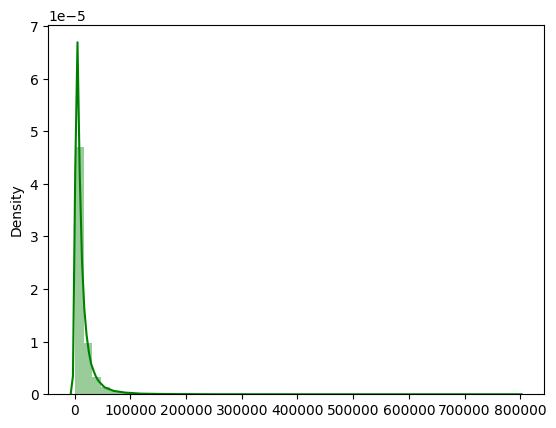

In [12]:
sns.distplot(trainset['Points_Sum'] - trainset['Point_NotFlight'],
             kde=True,
             color='green')

plt.show()
